In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [15]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [16]:
# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


In [17]:
# Build the autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x) #low dimensional image with noise created here

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # image reconstructed without noise 


# Autoencoder
autoencoder = Model(input_img, decoded) # training with the original input and reconstructed output.(samples of 60k for mnist dataset)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.2820 - val_loss: 0.1161
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.1152 - val_loss: 0.1086
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.1086 - val_loss: 0.1052
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.1058 - val_loss: 0.1029
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.1038 - val_loss: 0.1013
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.1020 - val_loss: 0.1005
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.1007 - val_loss: 0.0992
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.0999 - val_loss: 0.0991
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.0992 - val_loss: 0.0985
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.0987 - val_loss: 0.0976


In [13]:

# Predict on noisy images
denoised_images = autoencoder.predict(x_test_noisy)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


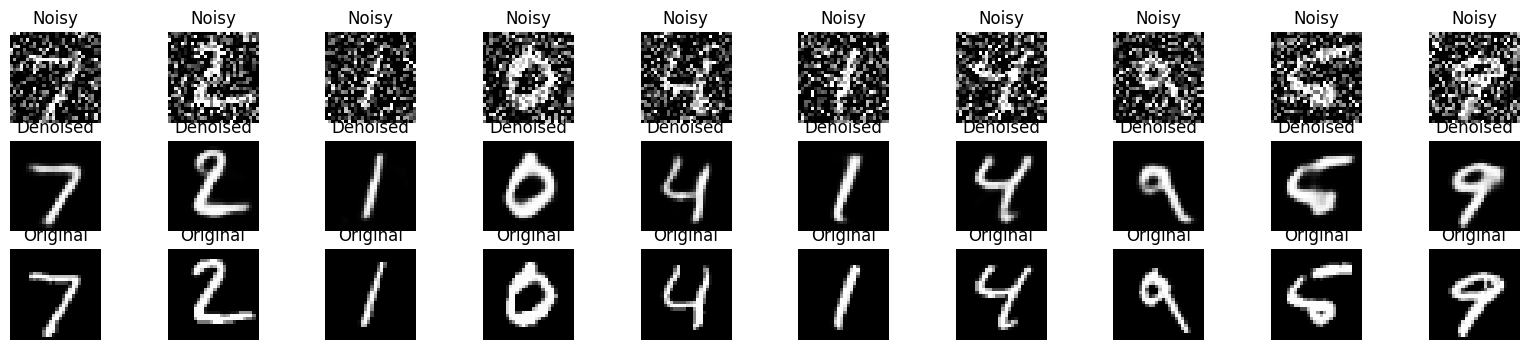

In [22]:
# Display the results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # Display original clean images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
    # Display original noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    
plt.show()

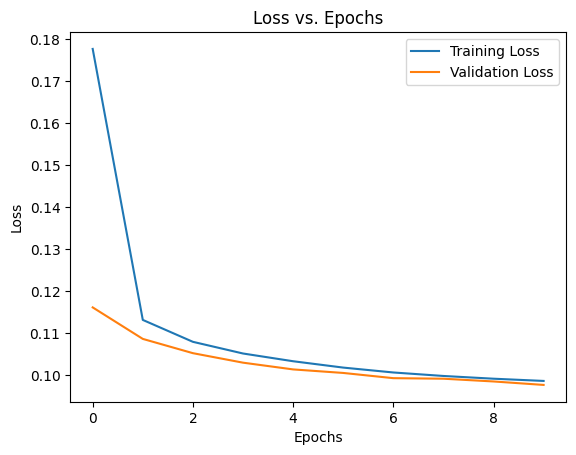

In [19]:
# Plot training and validation loss
history = autoencoder.history

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()